In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math
g=9.81

# Aufgabe 2 a

## Aufgabe 2 a - i

### Analytische Lösung

Um die Flugbahn des kugelformigen Objektes errechnen zu können müssen alle  wirkenden  Geschwindigkeiten  und Beschleunigungen  angetragen  werden. In x-Richtung  wirkt  lediglich  die  Anfangsgeschwindigkeit $v_0$. Es findet  keine ̈Anderung der Geschwindigkeit statt, woraus folgt:

$$
x = v_{0x} \cdot t + x_0 \\
\dot{x} = v_{0x} \\
\ddot{x} = 0
$$

Für die y-Richtung ergibt sich:

\begin{align}
y = -\frac{1}{2} \cdot g \cdot t^2 + v_{0y} \cdot t + y_0\\
\dot{y} = \frac{d}{dt} y = -g \cdot t + v_{0y}\\
\ddot{y} = \frac{d}{dt^2} y = -g
\end{align}

Das Koordinatensystem wird so gewählt, dass der Punkt des Abwurfes im Koordinatenursprung liegt. Dadurch ergibt sich: 

$$
x_0 = 0 \\
y_0 = 0 \\
x(t) = v_{0x} \cdot t \\
y(t) = -\frac{1}{2} \cdot g \cdot t^2 + v_{0y} \cdot t\\
$$

Die Geschwindigkeit $v_0$ wirkt in die Richtung die von dem dem Winkel ω vorgegeben wird. Diese muss in zwei Komponenten, die Richtungen der Achsen, aufgeteilt werden. Unter Verwendung der Winkelfunktionen ergibt sich:

\begin{align}
x(t) = v_{0x} \cdot t  = v_0 \cdot \cos(\omega) \cdot t \\
y(t) = -\frac{1}{2}g \cdot t^2 + v_{0y} \cdot t = -\frac{1}{2}g \cdot t^2 + v_0 \cdot \sin(\omega) \cdot t
\end{align}

Zunächst muss in Abhängigkeit der Abwurfwinkels $\omega$ ermittelt werden wie lange es dauert bis das Objekt wieder den Boden berührt. Dazu werden die Nullstellen Gleichung (4) mithilfe der Mitternachtsformel ermittelt.

\begin{align}
y(t) \stackrel{!}{=} 0 = -\frac{1}{2}g \cdot t^2 + v_0 \cdot \sin(\omega) \cdot t \\
y_{1/2} = \frac{-v_0 \cdot \sin(\omega)  \pm  \sqrt{v_0^2 \cdot \sin^2(\omega)}}{-g} \\
t_{1/2} = \left\{\begin{array}{ll} 0 \\
         \frac{2 \cdot v_0}{g} \cdot \sin(\omega) \end{array}\right. .
\end{align}

Die gesuchte Lösung ist $t_2$, denn $t_1$ stellt die Situation zum Moment des Abwurfes dar und ist somit trivial.
Als nächstes wird $t_2$ in Gleichung 3 eingesetzt. 

Man erhällt:

\begin{align}
x(\omega) = v_0 \cdot \cos(\omega) \cdot \frac{2 \cdot v_0}{g} \cdot \sin(\omega) \\
x(\omega) = x_0 + \frac{v_0^2}{g} \cdot \sin(2 \cdot \omega)
\end{align}

### Graphische Darstellung der analytischen Lösung

Zur graphischen Darstellung der Wurfbahn werden zunächst zwei Beispiele festgelegt:

\begin{align}
(1): v_0 = 10\frac{m}{s} \wedge \omega=30° \\
(2): v_0 = 7\frac{m}{s} \wedge \omega=45°
\end{align}

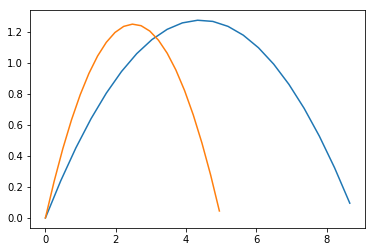

In [50]:
v0_1 = 10
omega_1 = 30
v0_2 = 7
omega_2 = 45

fx = lambda t, v0, omega : v0 * math.cos(math.radians(omega)) * t;      #Flugbahn x-Komponente
fy = lambda t, v0, omega: -0.5*g*t*t+v0*math.sin(math.radians(omega))*t #Flugbahn y-Komponente

plt.plot([fx(t, v0_1, omega_1) for t in np.arange(0, 1.03, 0.05)], [fy(t, v0_1, omega_1) for t in np.arange(0, 1.03, 0.05)])
plt.plot([fx(t, v0_2, omega_2) for t in np.arange(0, 1.01, 0.05)], [fy(t, v0_2, omega_2) for t in np.arange(0, 1.01, 0.05)])

Als Beispiele für die Wurfweiten wurden folgende Werte gewählt:

\begin{align}
(1): v_0 = 10\frac{m}{s} \\
(2): v_0 = 7.5\frac{m}{s} \\
(3): v_0 = 5\frac{m}{s} 
\end{align}

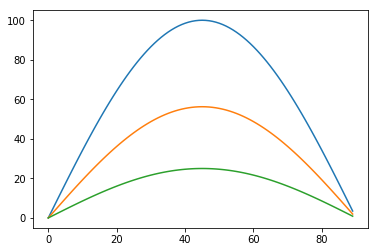

In [3]:
v0_1 = 10
v0_2 = 7.5
v0_3 = 5

ww = lambda omega, v0: v0 * v0 * math.sin(math.radians(2 * omega));

plt.plot(range(0,90), [ ww(omega, v0_1) for omega in range(0,90) ])
plt.plot(range(0,90), [ ww(omega, v0_2) for omega in range(0,90) ])
plt.plot(range(0,90), [ ww(omega, v0_3) for omega in range(0,90) ])

### Numerische Lösung

Zur numerischen Ermittlung der Flugbahn wird zunächst ein Vektor benötigt, der den Zustand des Systems zu einem bestimmten Zeitpunkt beschreibt sowie ein Weiterer der die erste Ableitung beschreibt. Diese sind:

\begin{align}
\vec{u}= \left( \begin{array}{c}v_x\\v_y\\x\\y\end{array} \right)  
\vec{\dot{u}}= \left( \begin{array}{c}0\\-g\\u(1)\\u(2)\end{array} \right)
\end{align}

Da das Koordinatensystem so gewählt wurde, dass der Moment des Abwurfes $t=0$ im Ursprung liegt, ergibt sich für den Startzustand:


\begin{align}
\vec{u_0}= \left( \begin{array}{c}
v_0 \cdot \cos(\omega) \\
v_0 \cdot \sin(\omega) \\
0\\
0\end{array} \right) 
\end{align}

Die numerische Berechnung:

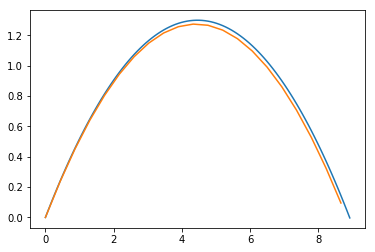

In [14]:
v0 = 10
omega = 30
u1=[v0*math.cos(math.radians(omega))]
u2=[v0*math.sin(math.radians(omega))]
u3=[0]
u4=[0]

dt = 0.01
while u4[-1]  >= 0: #Rechnen bis der erste y-Wert unterhalb von 0 liegt => Boden berührt
    du1=0
    du2=-g
    du3=u1[-1]
    du4=u2[-1]
    u1.append(u1[-1] + du1 * dt)
    u2.append(u2[-1] + du2 * dt)
    u3.append(u3[-1] + du3 * dt)
    u4.append(u4[-1] + du4 * dt)

plt.plot(u3, u4)
plt.plot([fx(t, v0_1, omega_1) for t in np.arange(0, 1.03, 0.05)], [fy(t, v0_1, omega_1) for t in np.arange(0, 1.03, 0.05)])

Werden nur wenige Iterationen zur Näherung verwendet zeigt sich ein Unterschied zur numerischen Lösung

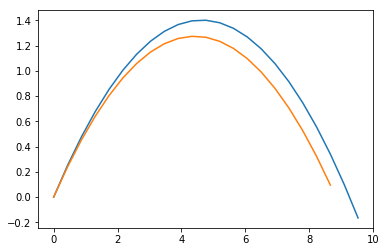

In [42]:
v0 = 10
omega = 30
u1=[v0*math.cos(math.radians(omega))]
u2=[v0*math.sin(math.radians(omega))]
u3=[0]
u4=[0]

dt = 0.05
while u4[-1]  >= 0: #Rechnen bis der erste y-Wert unterhalb von 0 liegt => Boden berührt
    du1=0
    du2=-g
    du3=u1[-1]
    du4=u2[-1]
    u1.append(u1[-1] + du1 * dt)
    u2.append(u2[-1] + du2 * dt)
    u3.append(u3[-1] + du3 * dt)
    u4.append(u4[-1] + du4 * dt)

plt.plot(u3, u4)
plt.plot([fx(t, v0_1, omega_1) for t in np.arange(0, 1.03, 0.05)], [fy(t, v0_1, omega_1) for t in np.arange(0, 1.03, 0.05)])


## Aufgabe 2 a - ii

$$
x(t)  = v_0 \cdot \cos(\frac{\pi}{2}) \cdot t = 0 \\
y(t)  = -\frac{1}{2}g \cdot t^2 + v_0 \cdot \sin(\frac{\pi}{2}) \cdot t = -\frac{1}{2}g \cdot t^2 + v_0 \cdot t\\
$$


Um den Zeitpunkt der maximalen Wurfhöhe $t_{max}$ zu erhalten, wird die zweite Ableitung null gesetzt.

$$
\dot{y} = \frac{d}{dt} y = -g \cdot t + v_0 = 0\\
t_{max} = \frac{v_0}{g}
$$

Eingesetzt in die obere Gleichung mit t ist der Zeitpunkt der maximalen Höhe.

$$
y_{max} = -\frac{1}{2}g \cdot t_{max}^2 + v_0 \cdot t_{max} = -\frac{1}{2}g \cdot ( \frac{v_0}{g} )^2 + v_0 \cdot ( \frac{v_0}{g} )\\
$$

Umgestellt nach $v_0$ ergibt sich

$$
v_0 = \sqrt{y_{max} \cdot g \cdot 2}
$$

In [53]:
y_max = 100

fv_0 = lambda y: math.sqrt(y * g * 2)

print ( 'Bei einer Höhe von ' + str(y_max) + 'm ergibt sich v0 = ' + str(fv_0(y_max)) + ' m/s')

Bei einer Höhe von 100m ergibt sich v0 = 44.294469180700204 m/s


Die gleiche Rechnung kann auch numerisch mit der Shooting Methode gelöst werden.

$$
y_{max} \ gegeben\\
y_0 = 0\\
\ddot{y} = -g\\
\dot{v}_0 \ gesucht
$$

In [ ]:
y_max = 100

f = lambda t,v0: -g/s * t**2 + v0 * t

t = 1
while fd(t) != 0:
    